In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_Date = session.query(Measurement).order_by(Measurement.date.desc()).first()
print(recent_Date.date)

2017-08-23


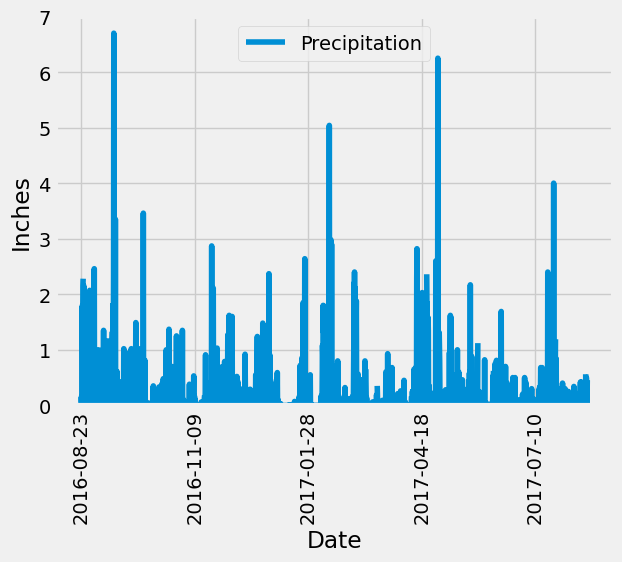

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
# Additional Comment: The most recent date in the data set was already found in the cell above

# Calculate the date one year from the last date in data set.
# Additional Comment: I tried to figure out how to pass a variable that contained the most recent date from above into this function
#                     so that if the date changed then this would still work. Couldn't get anything like that to work so I just manually
#                     entered the date.
prev_Year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
# Additional Comment: Since the most recent date is where the data ends, you can just grab everything past the previous year date.
rain_Data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= prev_Year).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
rain_Df = pd.DataFrame(rain_Data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
rain_Df.sort_values(by='Date')
rain_Df.set_index('Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
rain_Df.plot(rot=90, ylim=(0,7), ylabel='Inches')
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
rain_Df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).distinct().count()

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_Station = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').\
    group_by(Measurement.station)

for station in active_Station:
    print(f'Lowest Temperature: {station[1]}  Highest Temperature: {station[2]}  Average Temperature: {station[3]}')

Lowest Temperature: 54.0  Highest Temperature: 85.0  Average Temperature: 71.66378066378067


Text(0.5, 0, 'Temperature')

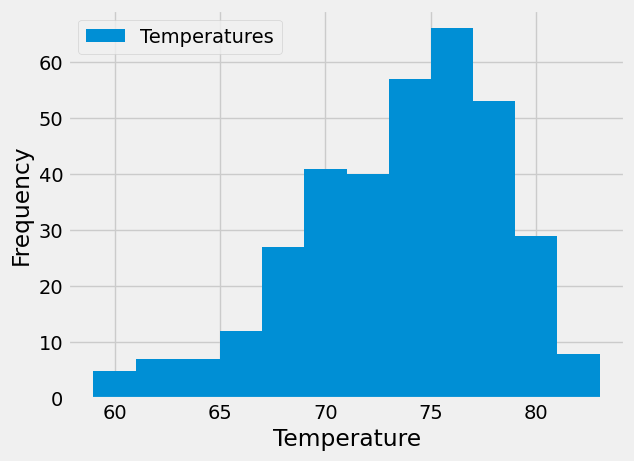

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_Temps = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_Year).all()

# Store query results in a DataFrame
temps_Df = pd.DataFrame(active_Temps, columns=['Date', 'Temperatures'])

# Plot DataFrame as a Histogram
temps_Df.plot.hist(bins=12)
plt.xlabel('Temperature')

# Close Session

In [16]:
# Close Session
session.close()